In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

pd.options.display.max_rows = 100

1.18.1
1.0.4
0.10.1


In [37]:
df = pd.read_csv(r'C:\Users\pratyusinha\Documents\machine learning\ML_projects\house_price_prediction\train.csv')
df_train = df[[col for col in df.columns if col != 'SalePrice']]
df_train_label =  df[['SalePrice']]
df_test = pd.read_csv(r'C:\Users\pratyusinha\Documents\machine learning\ML_projects\house_price_prediction\test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [38]:
print(df_train.shape)
print(df_test.shape)
df_combined = df_train.append(df_test)
print(df_combined.shape)
df_combined.head()

(1460, 80)
(1459, 80)
(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [39]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [40]:
column_with_nulls = []
for col in df_combined.columns:
    if df_combined[col].isnull().sum() > 0:
        column_with_nulls.append(dict({'column' : col, 'Null_val_count' : df_combined[col].isnull().sum()}))
sorted_null_cols = sorted(column_with_nulls, key = lambda k : k['Null_val_count'], reverse = True)
for i in range(len(sorted_null_cols)):
    print('{} {}'.format(sorted_null_cols[i]['column'], sorted_null_cols[i]['Null_val_count']))
#sorted(list_to_be_sorted, key=lambda k: k['name']) 

PoolQC 2909
MiscFeature 2814
Alley 2721
Fence 2348
FireplaceQu 1420
LotFrontage 486
GarageYrBlt 159
GarageFinish 159
GarageQual 159
GarageCond 159
GarageType 157
BsmtCond 82
BsmtExposure 82
BsmtQual 81
BsmtFinType2 80
BsmtFinType1 79
MasVnrType 24
MasVnrArea 23
MSZoning 4
Utilities 2
BsmtFullBath 2
BsmtHalfBath 2
Functional 2
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
KitchenQual 1
GarageCars 1
GarageArea 1
SaleType 1


Since the null values in the below columns are much, hence we can drop it.
- PoolQC 2909
- MiscFeature 2814
- Alley 2721
- Fence 2348

In [41]:
df_combined.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)
print(df_combined.shape)
df_combined.head()

(2919, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


categorical : 

- MSSubClass , MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood,     Condition1, Condition1, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond, PavedDrive, MiscFeature, SaleType, SaleCondition

need to modify : 

- MSSubClass , MSZoning

Ordinal : 

- OverallQual, OverallCond

int : 

- YearBuilt,YearRemodAdd, MasVnrArea, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal,MoSold,YrSold

In [42]:
df_combined['MSSubClass'].value_counts()
#df_combined['MSZoning'].value_counts()
#df_combined['YearBuilt'].value_counts() #.unique()
#df_combined['BsmtFinSF1'].head()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In the above, we can see that there are very less values of categories 150, 40, 180, 45, 75, 85, 190. Hence, we will group all of these values into a single category '190'.

In [43]:
bottom = [150, 40, 180, 45, 75, 85, 190]
df_combined.loc[df_combined.MSSubClass.isin(bottom),'MSSubClass'] = 190

In [44]:
df_combined['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In the above, we can see that there are very less values of categories StoneBr, SWISU, ClearCr, MeadowV, BrDale, Blmngtn, 
Veenker, NPkVill, Blueste. Hence, we will group all of these values into a single category 'StoneBr'.

In [45]:
bottom = ['StoneBr', 'SWISU', 'ClearCr', 'MeadowV', 'BrDale', 'Blmngtn', 'Veenker', 'NPkVill', 'Blueste']
df_combined.loc[df_combined.Neighborhood.isin(bottom),'Neighborhood'] = 'StoneBr'

In [46]:
df_combined['Neighborhood'].value_counts()

NAmes      443
StoneBr    295
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
Name: Neighborhood, dtype: int64

In [47]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [48]:
df_combined.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [49]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish',
                'GarageQual','FireplaceQu','GarageCond']
df_combined[columns_None] = df_combined[columns_None].fillna('None')

In [50]:
columns_NA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']

df_combined[columns_NA] = df_combined[columns_NA].fillna(df_combined[columns_NA].mode().iloc[0])

From the data description we can see that 'FireplaceQu' is an ordinal column

In [51]:
num_columns_na = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df_combined[num_columns_na] = df_combined[num_columns_na].fillna(df_combined[num_columns_na].mean())


In [52]:
df_combined.fillna(0, inplace = True)

### Checking the distribution

Pave    2907
Grvl      12
Name: Street, dtype: int64

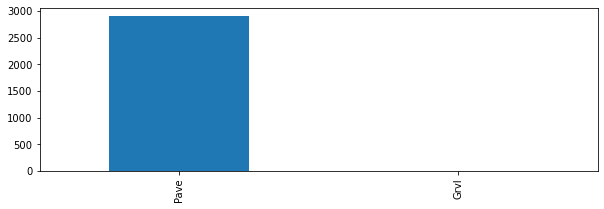

In [53]:
df_combined['Street'].value_counts().plot(kind='bar',figsize=[10,3])
df_combined['Street'].value_counts() 

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

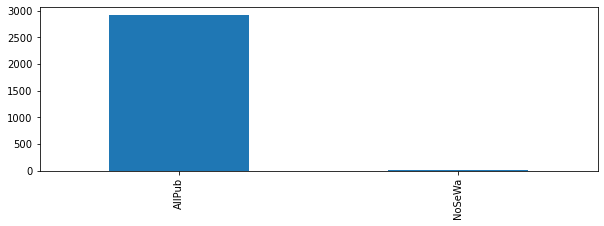

In [54]:
df_combined['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
df_combined['Utilities'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

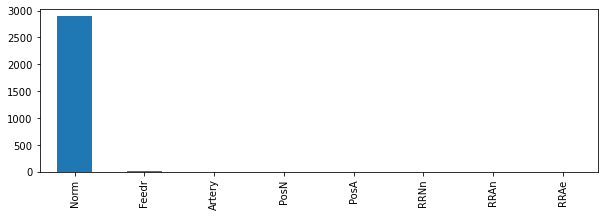

In [55]:
df_combined['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
df_combined['Condition2'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

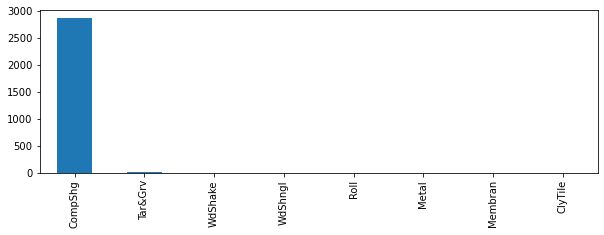

In [56]:
df_combined['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
df_combined['RoofMatl'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

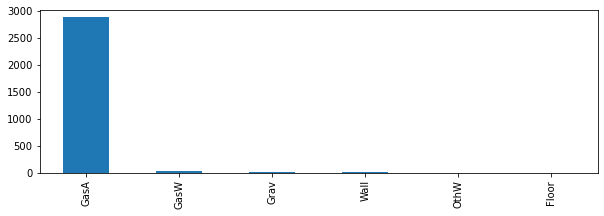

In [57]:
df_combined['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
df_combined['Heating'].value_counts()

### Dropping columns with uneven distribution

In [58]:
diff_distribution_cols = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
df_combined.drop(diff_distribution_cols, axis = 1, inplace = True)
print(df_combined.shape)
df_combined.head()

(2919, 71)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,StoneBr,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [59]:
df_combined['House_age'] = df_combined['YrSold'] - df_combined['YearBuilt']
df_combined['House_age'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: House_age, dtype: float64

In [60]:
print(df_combined[df_combined['House_age'] < 0].YrSold)
df_combined[df_combined['House_age'] < 0].YearBuilt

1089    2007
Name: YrSold, dtype: int64


1089    2008
Name: YearBuilt, dtype: int64

In [61]:
df_combined.loc[df_combined['YrSold'] < df_combined['YearBuilt'], 'YrSold'] = 2009
df_combined['House_age'] = df_combined['YrSold'] - df_combined['YearBuilt']
df_combined['House_age'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: House_age, dtype: float64

In [62]:
df_combined['TotalBsmtBath'] = df_combined['BsmtFullBath'] + df_combined['BsmtHalfBath'] * 0.5
df_combined['TotalBath'] = df_combined['FullBath'] + df_combined['HalfBath'] * 0.5
df_combined['TotalSA'] = df_combined['1stFlrSF'] + df_combined['2ndFlrSF'] + df_combined['TotalBsmtBath']

In [63]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,House_age,TotalBsmtBath,TotalBath,TotalSA
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,5,1.0,2.5,1711.0
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,StoneBr,...,0,0,5,2007,WD,Normal,31,0.5,2.0,1262.5
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,7,1.0,2.5,1787.0
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,91,1.0,1.0,1718.0
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,8,1.0,2.5,2199.0


In [66]:
#old_cal_colums = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'TotalBsmtBath',
#                  'YrSold', 'YearBuilt' ]
#df_combined.drop(old_cal_colums, axis = 1, inplace = True)

Ordinal:

MSSubClass, LotShape, BldgType, HouseStyle, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond,


Normal:

MSZoning, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, Foundation, CentralAir, PavedDrive, MiscFeature, SaleType, SaleCondition

In [67]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}

In [68]:
df_combined['ExterQual'] = df_combined['ExterQual'].map(bin_map)
df_combined['ExterCond'] = df_combined['ExterCond'].map(bin_map)
df_combined['BsmtCond'] = df_combined['BsmtCond'].map(bin_map)
df_combined['BsmtQual'] = df_combined['BsmtQual'].map(bin_map)
df_combined['HeatingQC'] = df_combined['HeatingQC'].map(bin_map)
df_combined['KitchenQual'] = df_combined['KitchenQual'].map(bin_map)
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].map(bin_map)
df_combined['GarageQual'] = df_combined['GarageQual'].map(bin_map)
df_combined['GarageCond'] = df_combined['GarageCond'].map(bin_map)
df_combined['CentralAir'] = df_combined['CentralAir'].map(bin_map)
df_combined['LotShape'] = df_combined['LotShape'].map(bin_map)
df_combined['BsmtExposure'] = df_combined['BsmtExposure'].map(bin_map)
df_combined['BsmtFinType1'] = df_combined['BsmtFinType1'].map(bin_map)
df_combined['BsmtFinType2'] = df_combined['BsmtFinType2'].map(bin_map)
df_combined['PavedDrive'] = df_combined['PavedDrive'].map(PavedDrive)

In [69]:
df_combined.select_dtypes(include=['object'])

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Electrical,Functional,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Typ,Attchd,RFn,WD,Normal
1,RL,Lvl,FR2,Gtl,StoneBr,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,SBrkr,Typ,Attchd,RFn,WD,Normal
2,RL,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Typ,Attchd,RFn,WD,Normal
3,RL,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,SBrkr,Typ,Detchd,Unf,WD,Abnorml
4,RL,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Typ,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Lvl,Inside,Gtl,StoneBr,Norm,Twnhs,2Story,Gable,CemntBd,CmentBd,None,CBlock,SBrkr,Typ,None,None,WD,Normal
1455,RM,Lvl,Inside,Gtl,StoneBr,Norm,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,CBlock,SBrkr,Typ,CarPort,Unf,WD,Abnorml
1456,RL,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,CBlock,SBrkr,Typ,Detchd,Unf,WD,Abnorml
1457,RL,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,PConc,SBrkr,Typ,None,None,WD,Normal


In [70]:
df_combined.shape

(2919, 66)

In [71]:
rest_object_columns = df_combined.select_dtypes(include=['object'])
#Using One hot encoder
df_combined = pd.get_dummies(df_combined, columns=rest_object_columns.columns)


Train - (1460, 80)
Test - (1459, 80)
(2919, 80)

In [72]:
df_combined = df_combined.drop(['Id',],axis=1)
df_combined.shape

(2919, 187)

In [73]:
df_combined.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,61.044878,69.305795,10168.114080,2.599863,6.089072,5.564577,1984.264474,102.201312,2.732100,2.189106,...,0.002741,0.081877,0.002398,0.865365,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,48.665935,21.312345,7886.996359,0.570175,1.409947,1.113131,20.894344,178.626089,0.982106,0.643844,...,0.052289,0.274225,0.048920,0.341392,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7478.000000,2.000000,5.000000,5.000000,1965.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.305795,9453.000000,3.000000,6.000000,5.000000,1993.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11570.000000,3.000000,7.000000,6.000000,2004.000000,163.500000,4.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,3.000000,10.000000,9.000000,2010.000000,1600.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
Train_data = df_combined.iloc[0:1460]
Test_data = df_combined.iloc[1460:]
target = df['SalePrice']

In [145]:
print(Train_data.shape)
print(Test_data.shape)
print(target.shape)

(1460, 196)
(1459, 196)
(1460,)


In [146]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import sklearn.metrics as metrics
import math

In [147]:
x_train,x_test,y_train,y_test = train_test_split(Train_data,target,test_size=0.3,random_state=0)

In [148]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)


lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=11000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, # 'was 0.2'
                                       )

In [149]:
xgb.fit(x_train, y_train)
lgbm.fit(x_train, y_train,eval_metric='rmse')

[23:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split', learning_rate=0.01,
              max_bin=200, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=11000,
              n_jobs=-1, num_leaves=4, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

lr_predict = model.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, lr_predict))))

Root Mean Square Error test = 40261.60771841153


In [151]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(x_train, y_train)

RF_predict = model.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, RF_predict))))

Root Mean Square Error test = 40261.60771841153


In [152]:
lr_predict1 = model.predict(x_test)

In [153]:
xgb.fit(x_train, y_train)
lgbm.fit(x_train, y_train,eval_metric='rmse')
predict1 = xgb.predict(x_test)
predict = lgbm.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))

[23:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test = 27225.196291480766
Root Mean Square Error test = 27488.923704826375


In [95]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))


Root Mean Square Error test = 27225.196291480766
Root Mean Square Error test = 27488.923704826375


In [96]:
xgb.fit(Train_data, target)
lgbm.fit(Train_data, target,eval_metric='rmse')

[23:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split', learning_rate=0.01,
              max_bin=200, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=11000,
              n_jobs=-1, num_leaves=4, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
predicted = lgbm.predict(Test_data)
submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": predicted
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
predicted3 = xgb.predict(Test_data)
submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": predicted3
    })
submission.to_csv('submission.csv', index=False)

In [97]:
predicted1 = lgbm.predict(Test_data)
predicted2 = xgb.predict(Test_data)
predict_y = ( predicted1*0.35 + predicted2 * 0.65)
submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": predict_y
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
print("There are {} colums with int type.".format(list(np.array(df.dtypes)).count('int64')))
print("There are {} colums with float type.".format(list(np.array(df.dtypes)).count('float')))
print("There are {} colums with string type.".format(list(np.array(df.dtypes)).count('object')))

In [75]:
#pd.get_dummies(df['MSZoning'])
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300
df_combined.corr()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,House_age,TotalBath,TotalSA,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.350157,-0.184982,0.087323,0.009381,-0.009818,0.008221,-0.022274,-0.006044,-0.030152,0.094606,-0.021762,0.075508,0.042967,-0.059104,-0.029599,-0.068590,-0.133990,-0.220876,-0.033269,-0.091012,0.070650,0.033209,-0.034184,0.218162,-0.030393,0.007820,-0.057340,-0.068400,2.746511e-02,-0.070275,-0.114892,-0.082214,-0.107342,-0.035961,-0.023851,-0.019932,0.021009,-0.040749,-0.041586,0.003865,-0.027323,0.000104,0.028916,0.111627,0.026875,-0.001996,0.130088,0.066905,-0.322227,0.275158,0.050171,-0.007993,-0.035365,-0.010705,-0.039906,-0.035906,0.032711,0.033158,0.035892,0.014032,-0.010454,-0.012084,0.001759,-0.113056,0.005052,-0.010535,-0.015317,0.006527,0.018567,-0.165285,-0.053965,-0.012988,-0.002233,0.074991,-0.042527,-0.001760,0.071337,0.296468,-0.075136,0.028768,-0.027253,0.033022,-0.046166,-0.027028,-0.022339,0.002591,-0.022738,-0.007544,-0.678491,0.375768,0.117202,0.363188,0.422825,-0.001320,0.188253,-0.471136,0.122774,0.187508,0.250567,0.366977,0.106464,-0.019707,0.146353,0

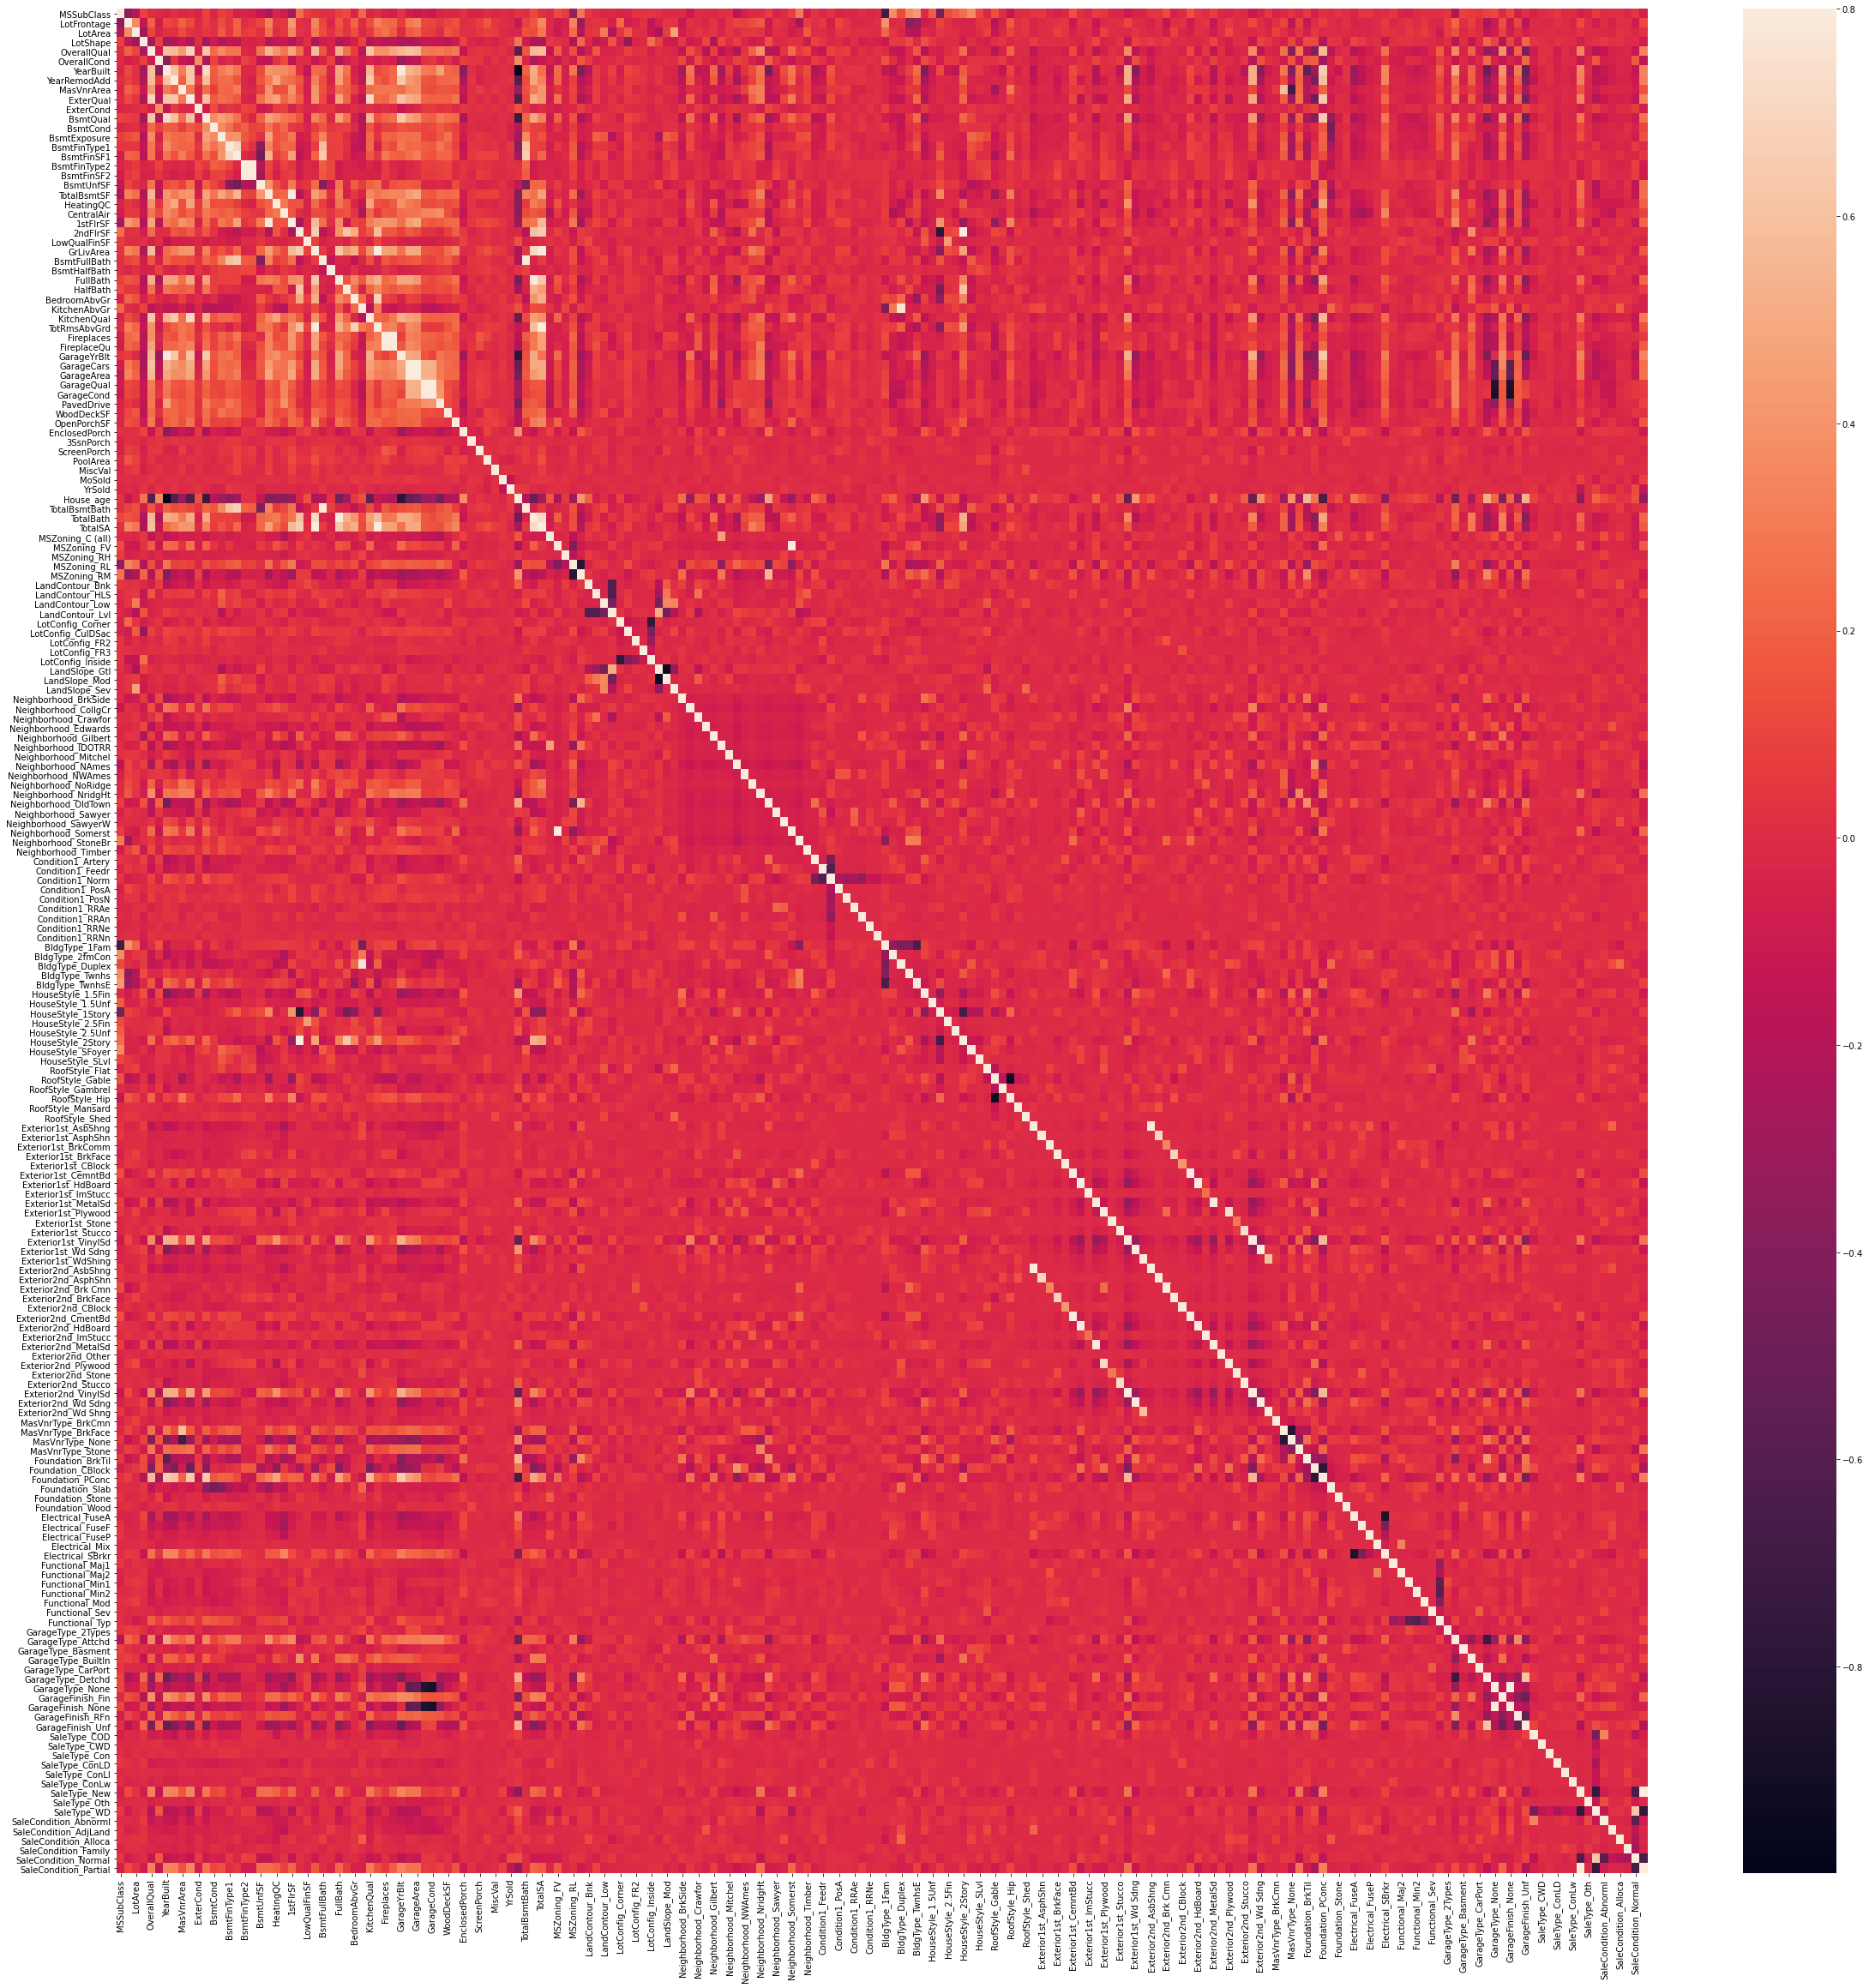

In [209]:
import matplotlib.pyplot as plt

corr = df_combined.corr()
plt.figure(figsize = (40,40))
sns.heatmap(corr, vmax=0.8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])
df['MSZoning'].head()

In [ ]:
tmp = df.info().index
tmp[0]

In [ ]:
SaleConditionVal = list(pd.value_counts(df['SaleCondition']).index)
SaleConditionVal

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

x = one_hot_encoder.fit_transform(df['SaleCondition'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(x, columns = ["SaleCondition_"+ x for x in SaleConditionVal]) 

#dfOneHot.head()

df = pd.concat([df, dfOneHot], axis = 1)

df.head()

In [ ]:
dfOneHot.head()

In [107]:
import statsmodels.api as sm

def var_cal(df):
    vif_df = pd.DataFrame(columns = ['var', 'vif'])
    x_var_names = df.columns
    for i in range(x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop(x_var_names[i])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1 / (1 - r_squared), 2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'vif', axis = 0, inplace=False)

#var_cal(dfOneHot)

In [204]:
#df_vif = df_combined.copy()

old_cal_colums = ['GarageCars']
df_vif.drop(old_cal_colums, axis = 1, inplace = True)

In [205]:
pd.options.display.max_rows = 300

In [206]:
var_cal(df_vif)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,var,vif
42,3SsnPorch,1.08
45,MiscVal,1.10
46,MoSold,1.10
43,ScreenPorch,1.16
44,PoolArea,1.20
9,ExterCond,1.34
39,WoodDeckSF,1.36
40,OpenPorchSF,1.37
41,EnclosedPorch,1.38
2,LotShape,1.53


In [199]:
df_vif = df_combined.copy()

In [207]:


Train_data = df_vif.iloc[0:1460]
Test_data = df_vif.iloc[1460:]
target = df['SalePrice']

print(Train_data.shape)
print(Test_data.shape)
print(target.shape)

x_train,x_test,y_train,y_test = train_test_split(Train_data,target,test_size=0.3,random_state=0)



xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)


lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=11000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, # 'was 0.2'
                                       )
									   
xgb.fit(x_train, y_train)
lgbm.fit(x_train, y_train,eval_metric='rmse')

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

lr_predict = model.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, lr_predict))))


from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(x_train, y_train)

RF_predict = model.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, RF_predict))))

xgb.fit(x_train, y_train)
lgbm.fit(x_train, y_train,eval_metric='rmse')
predict1 = xgb.predict(x_test)
predict = lgbm.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))

(1460, 193)
(1459, 193)
(1460,)
[00:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test = 40543.74144002792
Root Mean Square Error test = 40543.74144002792
[00:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test = 27904.765559540127
Root Mean Square Error test = 27883.813760923833
